# K-Nearest Neighbors (KNN)
K-Nearest Neighgors is a simple, instance based learning algorithm. It classifies a new data point based on how its neighbors are classified. 

In [2]:
# Import Libraries and Create a synthetic dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [3]:
%matplotlib inline

In [4]:
# create a synthetic dataset
X,y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, random_state=42)

In [5]:
# Split the dataset into training and test sets(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

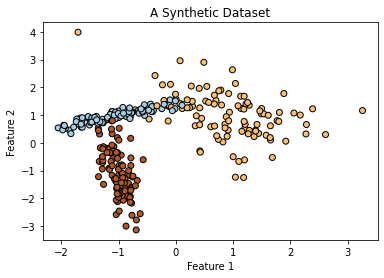

In [6]:
# Visualize the dataset
plt.scatter(X[:, 0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('A Synthetic Dataset')
plt.show()

# Determine the Optimal k using Cross-Validation

In [11]:
k_values = list(range(1,51))
cross_val_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())
    
optimal_k = k_values[cross_val_scores.index(max(cross_val_scores))]

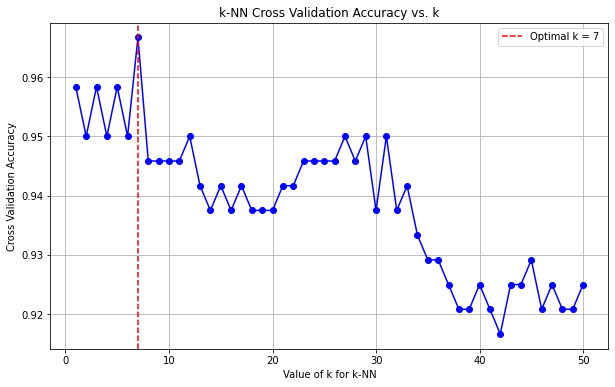

In [12]:
# Plot the Cross-Validation Results
plt.figure(figsize=(10,6))
plt.plot(k_values, cross_val_scores, marker='o',linestyle='-', color='b')
plt.xlabel('Value of k for k-NN')
plt.ylabel('Cross Validation Accuracy')
plt.title('k-NN Cross Validation Accuracy vs. k')
plt.axvline(x=optimal_k, color='r', linestyle='--',label=f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.show()
            

# Apply k-NN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Initialize the k-NN Classifier with the defined hyperparameters
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)


In [15]:
# Train the classsifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [18]:
# Evaluate the classifier's accuracy on the test data
knn_optimal.fit(X_train, y_train)
knn_optimal_accuracy = knn_optimal.score(X_test, y_test)
print(f"Accuracy of k-NN Classifier: {knn_optimal_accuracy:.4f}")

Accuracy of k-NN Classifier: 0.9333


# Visualize the Decision Boundaries

In [19]:
# Create a mesh to plot the decision boundaries
x_min,x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:, 1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.01))

In [21]:
# Predict the class using the classifier for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

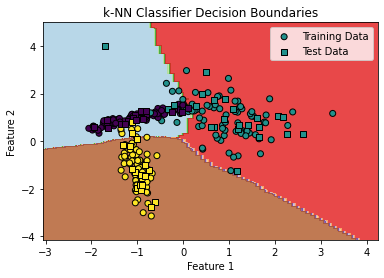

In [22]:
# Plot the decision boundaries
plt.contourf(xx,yy,Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', marker='s', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN Classifier Decision Boundaries')
plt.legend()
plt.show()